In [8]:
import h5py

# Investigate Multiome file more deeply
try:
    with h5py.File(multiome_path, 'r') as f:
        for key in f.keys():
            print(f"Key: {key}, Type: {type(f[key])}")
            if isinstance(f[key], h5py.Group):
                print(f"Group '{key}' contains: {list(f[key].keys())}")
            elif isinstance(f[key], h5py.Dataset):
                print(f"Dataset '{key}' shape: {f[key].shape}, dtype: {f[key].dtype}")
except OSError as e:
    print(f"Error investigating Multiome file: {e}")
except Exception as e:
    print(f"An unexpected error occurred with Multiome file: {e}")


Key: X, Type: <class 'h5py._hl.group.Group'>
Group 'X' contains: ['data', 'indices', 'indptr']
Key: layers, Type: <class 'h5py._hl.group.Group'>
Group 'layers' contains: ['counts']
Key: obs, Type: <class 'h5py._hl.group.Group'>
Group 'obs' contains: ['ATAC_atac_fragments', 'ATAC_blacklist_fraction', 'ATAC_nCount_peaks', 'ATAC_nucleosome_signal', 'ATAC_pseudotime_order', 'ATAC_reads_in_peaks_frac', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorGender', 'DonorID', 'DonorNumber', 'DonorRace', 'DonorSmoker', 'Ethnicity', 'GEX_n_counts', 'GEX_n_genes', 'GEX_pct_counts_mt', 'GEX_phase', 'GEX_pseudotime_order', 'GEX_size_factors', 'Modality', 'QCMeds', 'Samplename', 'Site', 'VendorLot', '__categories', '_index', 'batch', 'cell_type']
Key: obsm, Type: <class 'h5py._hl.group.Group'>
Group 'obsm' contains: ['ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap']
Key: uns, Type: <class 'h5py._hl.group.Group'>
Group 'uns' contains: ['ATAC_gene_activity_var_

In [18]:
from sklearn.impute import SimpleImputer


In [19]:
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


In [25]:
import h5py

# actual file path
file_path = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Print all keys at the top level
    print("Keys in the HDF5 file:", list(f.keys()))
    
    # Print more detailed information if needed, e.g., within groups
    if 'obsm' in f:
        print("\nKeys in 'obsm':", list(f['obsm'].keys()))
    if 'var' in f:
        print("\nKeys in 'var':", list(f['var'].keys()))


Keys in the HDF5 file: ['X', 'layers', 'obs', 'obsm', 'uns', 'var']

Keys in 'obsm': ['ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap']

Keys in 'var': ['__categories', '_index', 'feature_types', 'gene_id']


In [27]:
import h5py

# actual file path
file_path = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Print keys in 'obsm' group
    obsm_keys = list(f['obsm'].keys())
    print("Keys in 'obsm':", obsm_keys)
    
    # Check keys in 'var' group as well
    var_keys = list(f['var'].keys())
    print("Keys in 'var':", var_keys)
    
    # Iterate through obsm keys to find the correct key for protein expression data
    adt_key = None
    for key in obsm_keys:
        if 'ADT' in key or 'GEX' in key:
            adt_key = key
            break
    
    # Check if adt_key is found
    if adt_key is None:
        raise ValueError("Unable to find the correct key for protein expression data in 'obsm'.")
    
    # Access the protein expression data using the correct key
    adt_df = f['obsm'][adt_key]
    
    # Proceed with preprocessing steps
    imputer = SimpleImputer(strategy='mean')
    gex_adt_imputed = imputer.fit_transform(gex_adt_df)
    
    # Further preprocessing or analysis steps
    # ...


Keys in 'obsm': ['ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap']
Keys in 'var': ['__categories', '_index', 'feature_types', 'gene_id']


In [28]:
import h5py
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# actual file path
file_path = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'

# Open the HDF5 file
with h5py.File(file_path, 'r') as f:
    # Choose the appropriate key for protein expression data (ADT data)
    adt_key = 'ADT_X_pca'  # Adjust based on your specific data structure
    
    # Access the protein expression data
    adt_data = f['obsm'][adt_key][:]
    
    # Perform preprocessing (example: imputation and scaling)
    imputer = SimpleImputer(strategy='mean')
    adt_data_imputed = imputer.fit_transform(adt_data)
    
    scaler = StandardScaler()
    adt_data_scaled = scaler.fit_transform(adt_data_imputed)
    
    # Proceed with further analysis or visualization
    # Example: clustering, dimensionality reduction, etc.


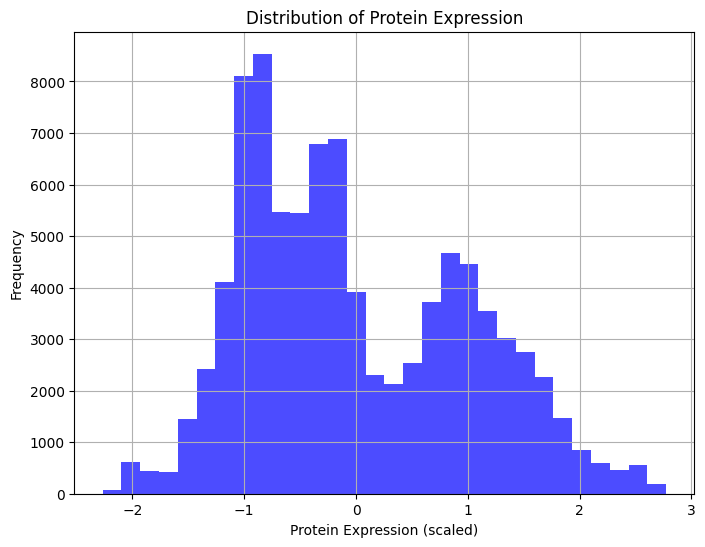

In [29]:
import matplotlib.pyplot as plt

# Example: Plot histogram of the first protein expression column
plt.figure(figsize=(8, 6))
plt.hist(adt_data_scaled[:, 0], bins=30, color='blue', alpha=0.7)
plt.xlabel('Protein Expression (scaled)')
plt.ylabel('Frequency')
plt.title('Distribution of Protein Expression')
plt.grid(True)
plt.show()


In [32]:
# Assuming cite_seq_data contains CITE-Seq dataset loaded with appropriate libraries

# Preprocessing for CITE-Seq dataset
from sklearn.preprocessing import StandardScaler

# Extract GEX and ADT data
gex_data = cite_seq_data.X.toarray()  # Gene expression data
adt_data = cite_seq_data.obsm['ADT_X_pca']  # Protein expression data (replace 'ADT_X_pca' with actual key)

# Scale the data
scaler = StandardScaler()
gex_data_scaled = scaler.fit_transform(gex_data)
adt_data_scaled = scaler.fit_transform(adt_data)

# Handle missing values if any (replace NaNs or use imputation methods if necessary)

# Ensure dimensions are compatible for modeling
assert gex_data_scaled.shape[0] == adt_data_scaled.shape[0], "Dimensions mismatch"

# Optionally, handle batch effects if applicable


c:\maniconda\envs\python_eda\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


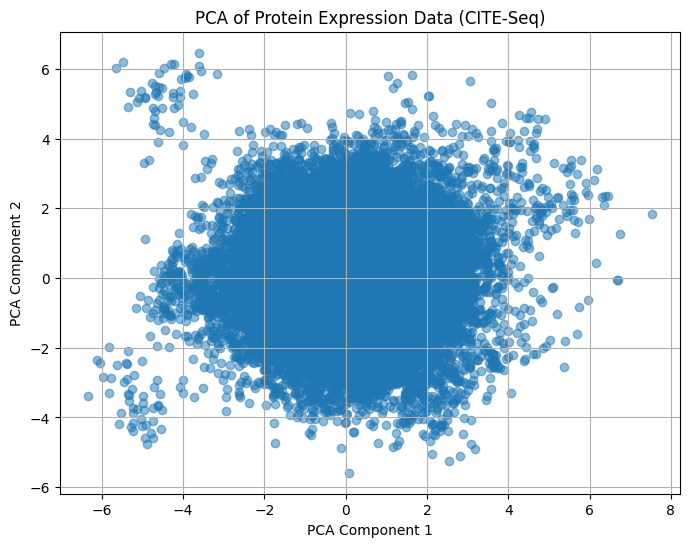

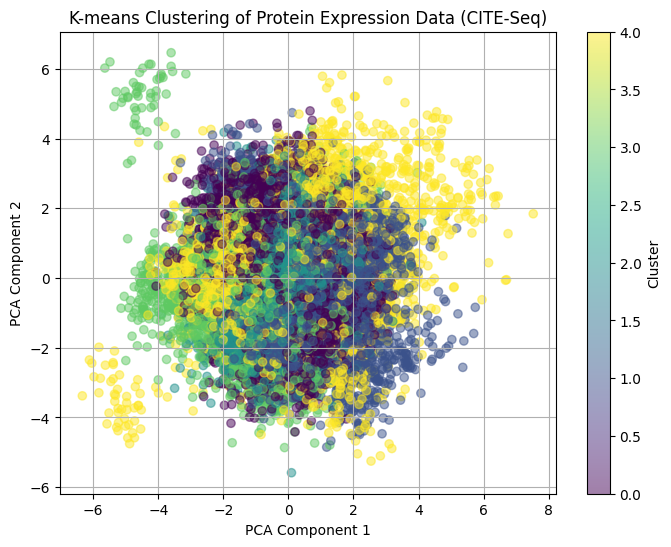

Silhouette Score (CITE-Seq): -0.013365346007049084
Davies-Bouldin Index (CITE-Seq): 5.801256142569777


In [12]:
import scanpy as sc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load CITE-Seq dataset
file_path = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'

# Load data into an AnnData object
cite_seq_data = sc.read(file_path)

# Extract GEX and ADT data
gex_data = cite_seq_data.X.toarray()  # Gene expression data
adt_data = cite_seq_data.obsm['ADT_X_pca']  # Protein expression data (replace 'ADT_X_pca' with actual key)

# Scale the data
scaler = StandardScaler()
gex_data_scaled = scaler.fit_transform(gex_data)
adt_data_scaled = scaler.fit_transform(adt_data)

# Handle missing values if any (replace NaNs or use imputation methods if necessary)

# Ensure dimensions are compatible for modeling
assert gex_data_scaled.shape[0] == adt_data_scaled.shape[0], "Dimensions mismatch"

# Perform PCA on ADT data
pca = PCA(n_components=2)
adt_pca_result = pca.fit_transform(adt_data_scaled)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(adt_pca_result[:, 0], adt_pca_result[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Protein Expression Data (CITE-Seq)')
plt.grid(True)
plt.show()

# Perform K-means clustering on ADT data
kmeans = KMeans(n_clusters=5, random_state=42)
adt_cluster_labels = kmeans.fit_predict(adt_data_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(adt_pca_result[:, 0], adt_pca_result[:, 1], c=adt_cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Protein Expression Data (CITE-Seq)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score
silhouette_avg = silhouette_score(adt_data_scaled, adt_cluster_labels)
print(f'Silhouette Score (CITE-Seq): {silhouette_avg}')

# Calculate Davies-Bouldin index
davies_bouldin_avg = davies_bouldin_score(adt_data_scaled, adt_cluster_labels)
print(f'Davies-Bouldin Index (CITE-Seq): {davies_bouldin_avg}')


In [2]:
import scanpy as sc

# File path
file_path = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad'

# Load the Multiome dataset
try:
    multiome_data = sc.read_h5ad(file_path)
    print("Multiome dataset loaded successfully.")
    
    # Inspect the main attributes of the AnnData object
    print("Shape of the data (observations, variables):", multiome_data.shape)
    print("Observations (obs):", multiome_data.obs.keys())
    print("Variables (var):", multiome_data.var.keys())
    print("Layers:", multiome_data.layers.keys())
    print("Obsm:", multiome_data.obsm.keys())
    print("Unstructured (uns):", multiome_data.uns.keys())
    
except Exception as e:
    print(f"Error loading Multiome file: {e}")


Multiome dataset loaded successfully.
Shape of the data (observations, variables): (69249, 129921)
Observations (obs): Index(['GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors',
       'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments',
       'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction',
       'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order',
       'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality',
       'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType',
       'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'],
      dtype='object')
Variables (var): Index(['feature_types', 'gene_id'], dtype='object')
Layers: KeysView(Layers with keys: counts)
Obsm: KeysView(AxisArrays with keys: ATAC_gene_activity, ATAC_lsi_full, ATAC_lsi_red, ATAC_umap, GEX_X_pca, GEX_X_umap)
Unstructured (uns): dict_keys(['ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'])


In [5]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix

# Extract GEX and ATAC data (as sparse matrices)
gex_data_multiome = multiome_data.X  # Gene expression data (GEX) as sparse matrix
atac_data = multiome_data.obsm['ATAC_lsi_red']  # ATAC-seq data (replace with appropriate key if needed)

# Scale the data (StandardScaler handles sparse matrices)
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse data
gex_data_scaled = scaler.fit_transform(gex_data_multiome)
atac_data_scaled = scaler.fit_transform(atac_data)


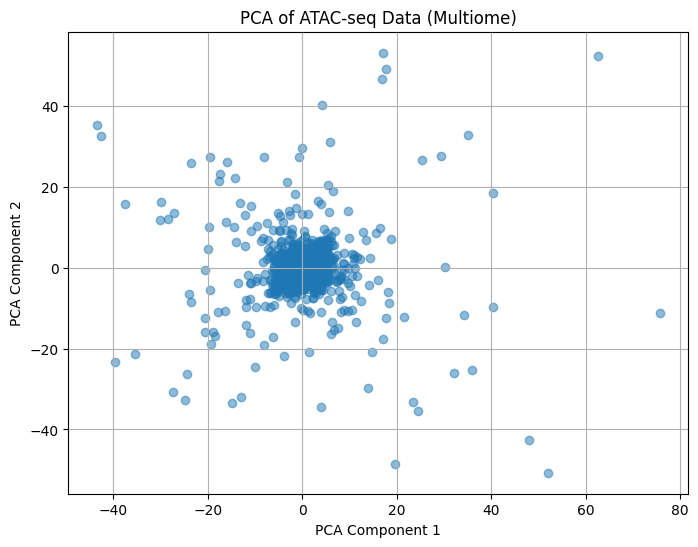

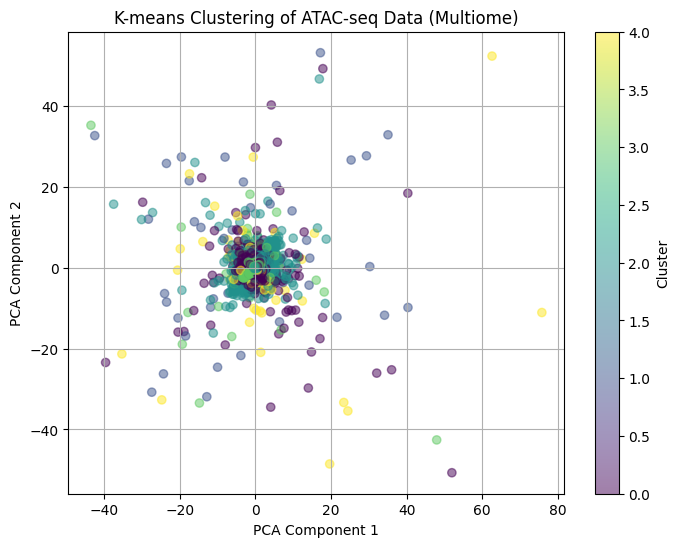

Silhouette Score (ATAC-seq, Multiome): 0.005348906258114573
Davies-Bouldin Index (ATAC-seq, Multiome): 3.740378059194313


In [14]:
import scanpy as sc
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

#  file path
file_path_multiome = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad'

# Load Multiome dataset
multiome_data = sc.read(file_path_multiome)

# Preprocessing for Multiome dataset
from sklearn.preprocessing import StandardScaler

# Extract GEX and ATAC data (as sparse matrices)
gex_data_multiome = multiome_data.X  # Gene expression data (GEX) as sparse matrix
atac_data = multiome_data.obsm['ATAC_lsi_red']  # ATAC-seq data (replace with appropriate key if needed)

# Scale the data (StandardScaler handles sparse matrices)
scaler = StandardScaler(with_mean=False)  # Set with_mean=False for sparse data
gex_data_scaled_multiome = scaler.fit_transform(gex_data_multiome)
atac_data_scaled = scaler.fit_transform(atac_data)

# Handle missing values if any (replace NaNs or use imputation methods if necessary)
imputer_multiome = SimpleImputer(strategy='mean')
atac_data_scaled_imputed = imputer_multiome.fit_transform(atac_data_scaled)

# Ensure there are no NaN values after imputation
if np.isnan(atac_data_scaled_imputed).any():
    raise ValueError("NaN values still present in the ATAC-seq data after imputation.")

# Perform PCA on ATAC data
pca = PCA(n_components=2)
atac_pca_result = pca.fit_transform(atac_data_scaled_imputed)

# Plot PCA result
plt.figure(figsize=(8, 6))
plt.scatter(atac_pca_result[:, 0], atac_pca_result[:, 1], alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of ATAC-seq Data (Multiome)')
plt.grid(True)
plt.show()

# Perform K-means clustering on ATAC data
kmeans = KMeans(n_clusters=5, random_state=42)
atac_cluster_labels = kmeans.fit_predict(atac_data_scaled_imputed)

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(atac_pca_result[:, 0], atac_pca_result[:, 1], c=atac_cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of ATAC-seq Data (Multiome)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score for ATAC data
silhouette_avg_multiome = silhouette_score(atac_data_scaled_imputed, atac_cluster_labels)
print(f'Silhouette Score (ATAC-seq, Multiome): {silhouette_avg_multiome}')

# Calculate Davies-Bouldin index for ATAC data
davies_bouldin_avg_multiome = davies_bouldin_score(atac_data_scaled_imputed, atac_cluster_labels)
print(f'Davies-Bouldin Index (ATAC-seq, Multiome): {davies_bouldin_avg_multiome}')


c:\maniconda\envs\python_eda\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Silhouette Score (CITE-Seq): -0.013363762758672237
Davies-Bouldin Index (CITE-Seq): 5.801351627168126
Silhouette Score (ATAC-seq, Multiome): 0.01945230219241688
Davies-Bouldin Index (ATAC-seq, Multiome): 3.3619533709169813


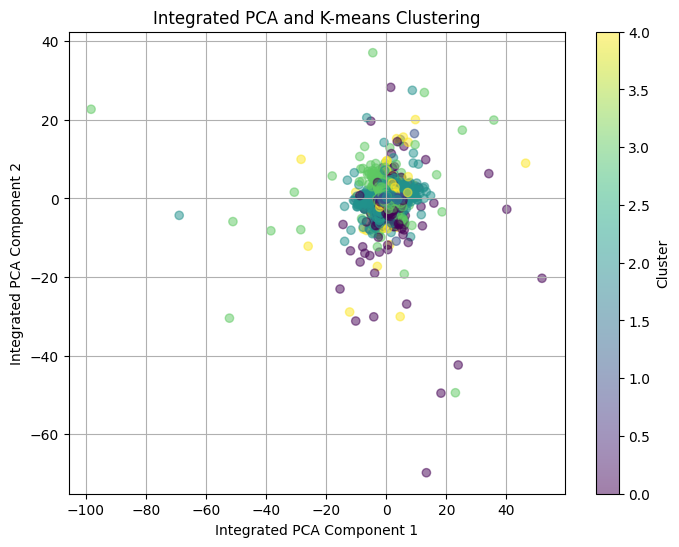

Integrated Silhouette Score: 0.0030442697168723207
Integrated Davies-Bouldin Index: 4.581652499042553


In [10]:
import scanpy as sc
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load CITE-Seq dataset
file_path_citeseq = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad'
cite_seq_data = sc.read(file_path_citeseq)

# Extract GEX and ADT data for CITE-Seq
gex_data_citeseq = csr_matrix(cite_seq_data.X)  # Convert to sparse matrix
adt_data_citeseq = csr_matrix(cite_seq_data.obsm['ADT_X_pca'])  # Convert to sparse matrix if not already sparse

# Scale the data for CITE-Seq
scaler_citeseq = StandardScaler(with_mean=False)  # Set with_mean=False for sparse data
gex_data_scaled_citeseq = scaler_citeseq.fit_transform(gex_data_citeseq)
adt_data_scaled_citeseq = scaler_citeseq.fit_transform(adt_data_citeseq)

# Perform Incremental PCA on ADT data for CITE-Seq
pca_citeseq = IncrementalPCA(n_components=2, batch_size=1000)  # Adjust batch_size as needed
adt_pca_result_citeseq = pca_citeseq.fit_transform(adt_data_scaled_citeseq)

# Perform K-means clustering on ADT data for CITE-Seq
kmeans_citeseq = KMeans(n_clusters=5, random_state=42)
adt_cluster_labels_citeseq = kmeans_citeseq.fit_predict(adt_data_scaled_citeseq)

# Calculate silhouette score for CITE-Seq
silhouette_avg_citeseq = silhouette_score(adt_data_scaled_citeseq, adt_cluster_labels_citeseq)
print(f'Silhouette Score (CITE-Seq): {silhouette_avg_citeseq}')

# Convert sparse matrix to dense for Davies-Bouldin index calculation
adt_data_scaled_citeseq_dense = adt_data_scaled_citeseq.toarray()
davies_bouldin_avg_citeseq = davies_bouldin_score(adt_data_scaled_citeseq_dense, adt_cluster_labels_citeseq)
print(f'Davies-Bouldin Index (CITE-Seq): {davies_bouldin_avg_citeseq}')

# Load Multiome dataset
file_path_multiome = r'C:\Users\My computer & laptop\OneDrive\Desktop\javed data\GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad'
multiome_data = sc.read(file_path_multiome)

# Extract GEX and ATAC data for Multiome
gex_data_multiome = csr_matrix(multiome_data.X)  # Convert to sparse matrix
atac_data_multiome = csr_matrix(multiome_data.obsm['ATAC_lsi_red'])  # Convert to sparse matrix if not already sparse

# Scale the data for Multiome
scaler_multiome = StandardScaler(with_mean=False)  # Set with_mean=False for sparse data
gex_data_scaled_multiome = scaler_multiome.fit_transform(gex_data_multiome)

# Handle missing values in ATAC data for Multiome
imputer_multiome = SimpleImputer(strategy='mean')
atac_data_scaled_multiome_imputed = imputer_multiome.fit_transform(atac_data_multiome)

# Perform Incremental PCA on ATAC data for Multiome
pca_multiome = IncrementalPCA(n_components=2, batch_size=1000)  # Adjust batch_size as needed
atac_pca_result_multiome = pca_multiome.fit_transform(atac_data_scaled_multiome_imputed)

# Perform K-means clustering on ATAC data for Multiome
kmeans_multiome = KMeans(n_clusters=5, random_state=42)
atac_cluster_labels_multiome = kmeans_multiome.fit_predict(atac_data_scaled_multiome_imputed)

# Calculate silhouette score for ATAC data in Multiome
silhouette_avg_multiome = silhouette_score(atac_data_scaled_multiome_imputed, atac_cluster_labels_multiome)
print(f'Silhouette Score (ATAC-seq, Multiome): {silhouette_avg_multiome}')

# Convert sparse matrix to dense for Davies-Bouldin index calculation
atac_data_scaled_multiome_imputed_dense = csr_matrix(atac_data_scaled_multiome_imputed).toarray()
davies_bouldin_avg_multiome = davies_bouldin_score(atac_data_scaled_multiome_imputed_dense, atac_cluster_labels_multiome)
print(f'Davies-Bouldin Index (ATAC-seq, Multiome): {davies_bouldin_avg_multiome}')

# Integration of results
# Combine PCA results
integrated_pca_result = np.concatenate((adt_pca_result_citeseq, atac_pca_result_multiome), axis=0)

# Combine cluster labels
integrated_cluster_labels = np.concatenate((adt_cluster_labels_citeseq, atac_cluster_labels_multiome), axis=0)

# Aggregate silhouette scores (average)
integrated_silhouette_avg = np.mean([silhouette_avg_citeseq, silhouette_avg_multiome])

# Aggregate Davies-Bouldin indices (average)
integrated_davies_bouldin_avg = np.mean([davies_bouldin_avg_citeseq, davies_bouldin_avg_multiome])

# Save the integrated PCA results and cluster labels to files
output_path = r'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/'

# Save PCA results
np.save(output_path + 'integrated_pca_result.npy', integrated_pca_result)

# Save cluster labels
np.save(output_path + 'integrated_cluster_labels.npy', integrated_cluster_labels)

# Example plot of integrated PCA result
plt.figure(figsize=(8, 6))
plt.scatter(integrated_pca_result[:, 0], integrated_pca_result[:, 1], c=integrated_cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('Integrated PCA Component 1')
plt.ylabel('Integrated PCA Component 2')
plt.title('Integrated PCA and K-means Clustering')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

# Print integrated scores
print(f'Integrated Silhouette Score: {integrated_silhouette_avg}')
print(f'Integrated Davies-Bouldin Index: {integrated_davies_bouldin_avg}')



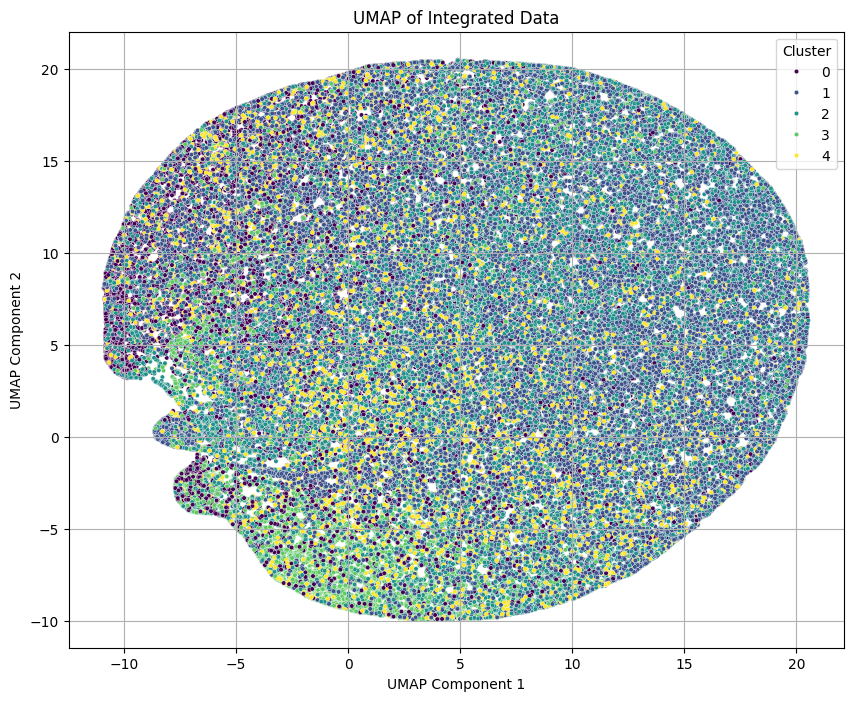

In [13]:
import seaborn as sns
import umap

# Perform UMAP for integrated PCA results
reducer = umap.UMAP()
integrated_umap_result = reducer.fit_transform(integrated_pca_result)

# Plot UMAP result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=integrated_umap_result[:, 0], y=integrated_umap_result[:, 1], hue=integrated_cluster_labels, palette='viridis', s=10)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Integrated Data')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [14]:
import pandas as pd

# Create a DataFrame with integrated data
integrated_df = pd.DataFrame(integrated_pca_result, columns=['PCA1', 'PCA2'])
integrated_df['Cluster'] = integrated_cluster_labels

# Calculate mean expression profiles for each cluster
mean_profiles = integrated_df.groupby('Cluster').mean()

# Print the mean profiles
print(mean_profiles)


             PCA1      PCA2
Cluster                    
0       -0.776436 -0.070737
1        0.198071  0.484350
2        0.111840 -0.096978
3        0.596648 -0.605226
4       -0.078999 -0.021319


c:\maniconda\envs\python_eda\Lib\site-packages\anndata\_core\anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\maniconda\envs\python_eda\Lib\site-packag

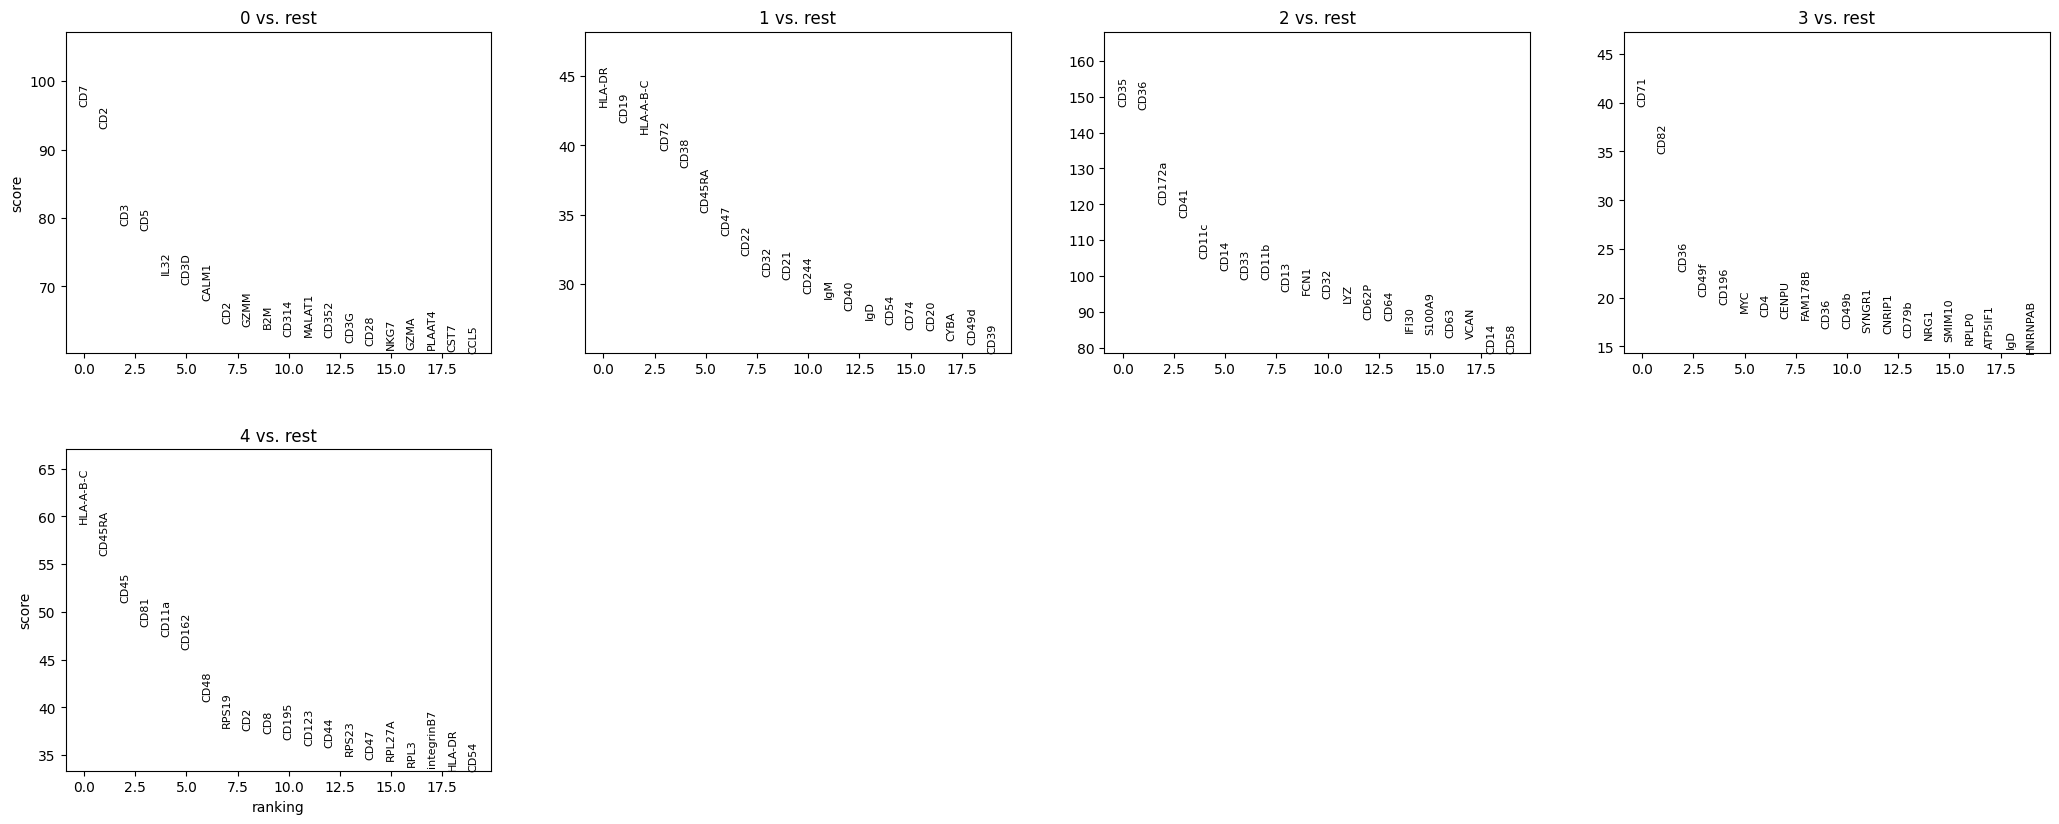

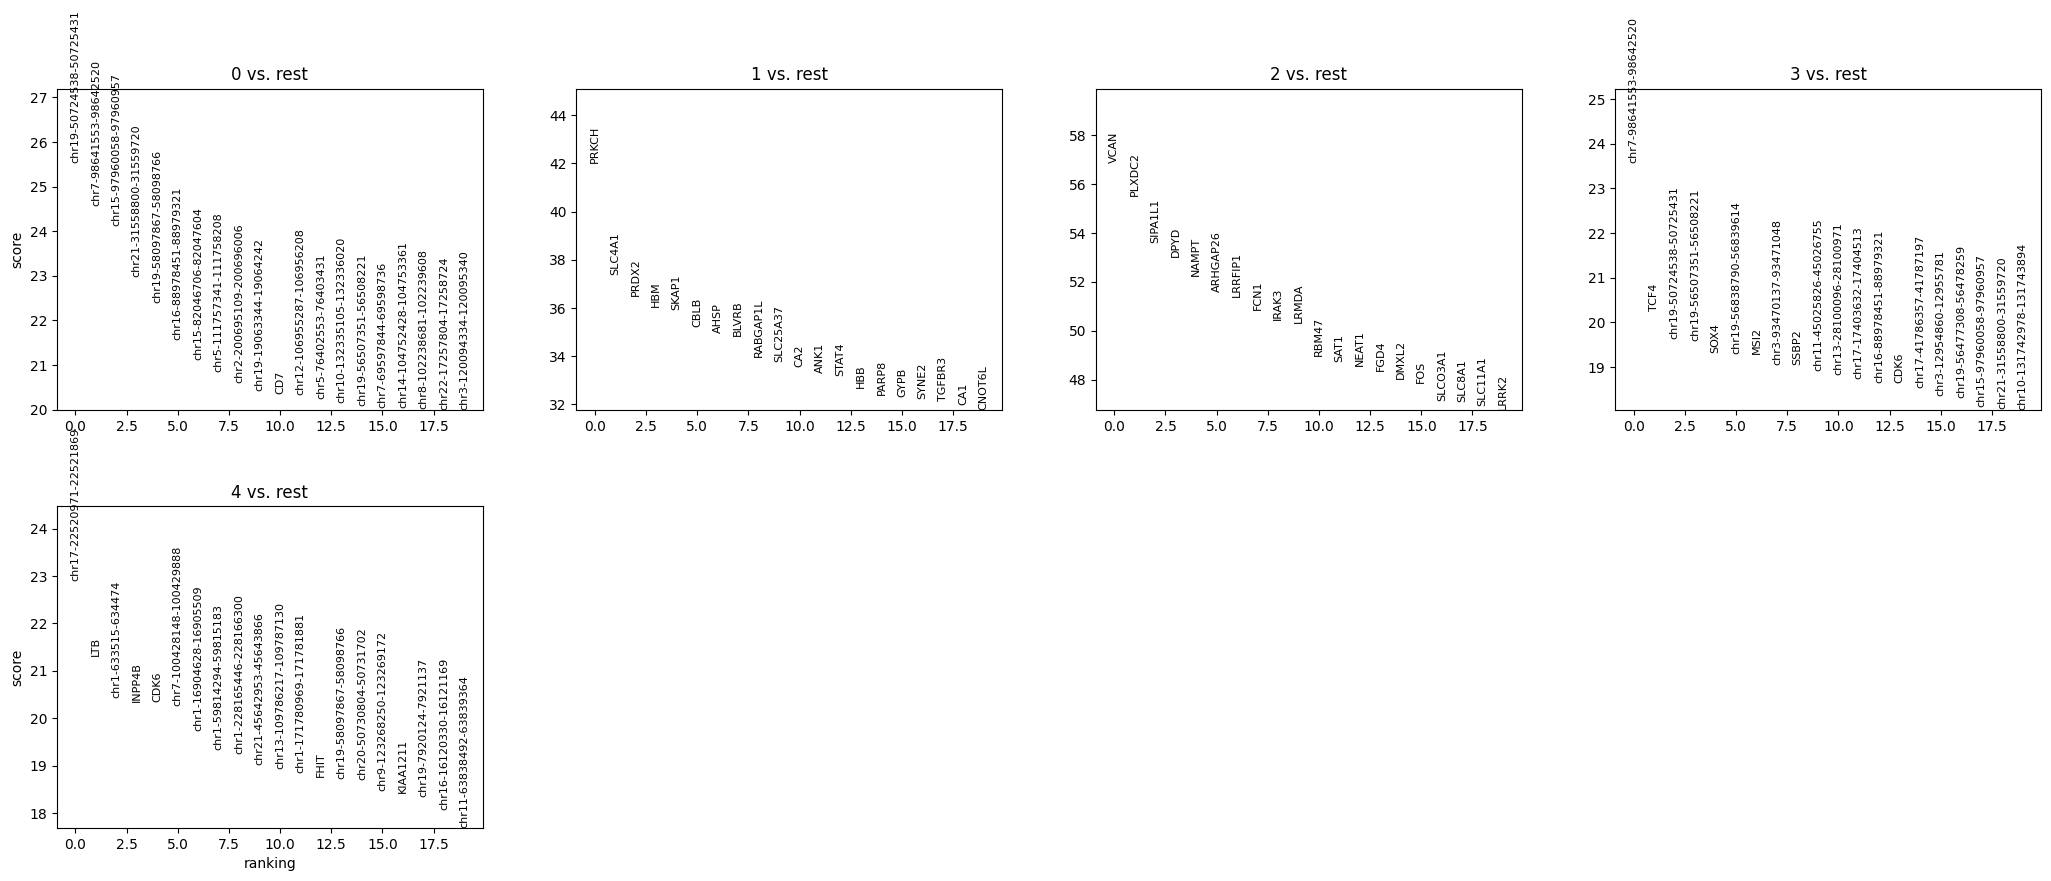

In [15]:
import scanpy as sc

# Load the raw data again for analysis
adata_citeseq = sc.read(file_path_citeseq)
adata_multiome = sc.read(file_path_multiome)

# Add the cluster labels to the AnnData object
adata_citeseq.obs['Cluster'] = adt_cluster_labels_citeseq.astype(str)
adata_multiome.obs['Cluster'] = atac_cluster_labels_multiome.astype(str)

# Identify marker genes for each cluster
sc.tl.rank_genes_groups(adata_citeseq, 'Cluster', method='t-test')
sc.tl.rank_genes_groups(adata_multiome, 'Cluster', method='t-test')

# Plot the top marker genes
sc.pl.rank_genes_groups(adata_citeseq, n_genes=20, sharey=False)
sc.pl.rank_genes_groups(adata_multiome, n_genes=20, sharey=False)


c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
c:\maniconda\envs\python_eda\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


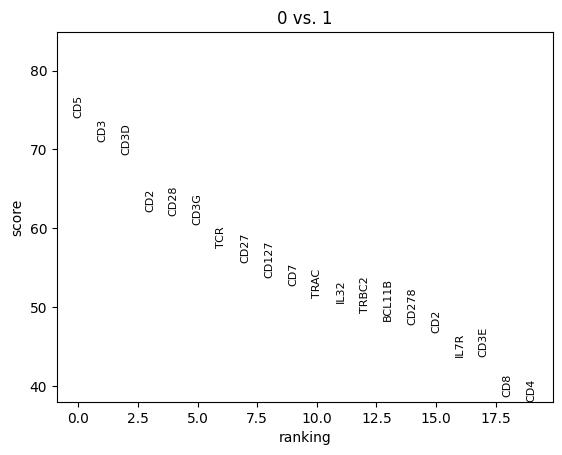

In [16]:
# Perform differential expression analysis between two clusters (example: cluster 0 vs cluster 1)
sc.tl.rank_genes_groups(adata_citeseq, 'Cluster', groups=['0'], reference='1', method='t-test')
sc.pl.rank_genes_groups(adata_citeseq, n_genes=20, sharey=False)


In [22]:
# Inspect the keys in adata_citeseq.uns
print("Keys in adata_citeseq.uns:", adata_citeseq.uns.keys())

# If 'rank_genes_groups' is present, inspect its structure
if 'rank_genes_groups' in adata_citeseq.uns:
    print("Keys in adata_citeseq.uns['rank_genes_groups']:", adata_citeseq.uns['rank_genes_groups'].keys())
    print("Contents of adata_citeseq.uns['rank_genes_groups']['names']:", adata_citeseq.uns['rank_genes_groups']['names'])
else:
    print("'rank_genes_groups' not found in adata_citeseq.uns")


Keys in adata_citeseq.uns: dict_keys(['dataset_id', 'genome', 'organism', 'rank_genes_groups'])
Keys in adata_citeseq.uns['rank_genes_groups']: dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])
Contents of adata_citeseq.uns['rank_genes_groups']['names']: [('CD5',) ('CD3',) ('CD3D',) ... ('CD32',) ('CD35',) ('HLA-DR',)]


  source      native                        name       p_value  significant  \
0  GO:BP  GO:0042110           T cell activation  6.382768e-14         True   
1  GO:BP  GO:0046649       lymphocyte activation  2.866743e-12         True   
2   KEGG  KEGG:04640  Hematopoietic cell lineage  3.942711e-12         True   
3  GO:BP  GO:0030217      T cell differentiation  8.110197e-12         True   
4  GO:BP  GO:0045321        leukocyte activation  2.306243e-11         True   

                                         description  term_size  query_size  \
0  "The change in morphology and behavior of a ma...        555          12   
1  "A change in morphology and behavior of a lymp...        783          12   
2                         Hematopoietic cell lineage         92          12   
3  "The process in which a precursor cell type ac...        308          12   
4  "A change in morphology and behavior of a leuk...        946          12   

   intersection_size  effective_domain_size  preci

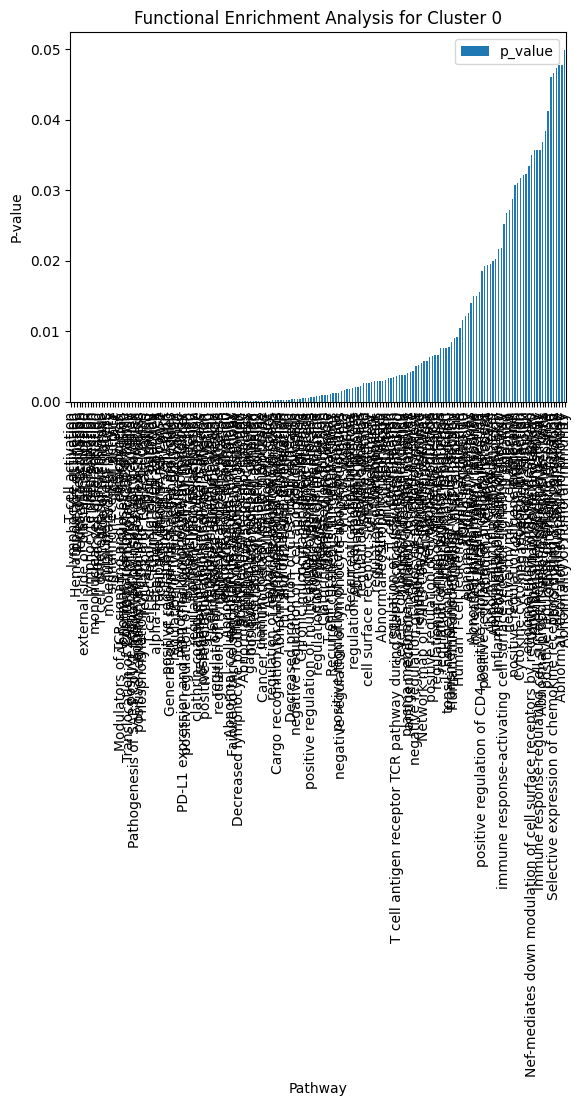

In [23]:
from gprofiler import GProfiler

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Extract the top 20 genes for cluster 0
top_genes_cluster_0 = [gene[0] for gene in adata_citeseq.uns['rank_genes_groups']['names'][:20]]

# Perform enrichment analysis
enrichment_results = gp.profile(organism='hsapiens', query=top_genes_cluster_0)

# Print and plot enrichment results
print(enrichment_results.head())
enrichment_results.plot.bar(x='name', y='p_value')
plt.title('Functional Enrichment Analysis for Cluster 0')
plt.xlabel('Pathway')
plt.ylabel('P-value')
plt.show()


In [24]:
enrichment_results.to_csv('C:/Users/My computer & laptop/OneDrive/Desktop/javed data/enrichment_results_cluster_0.csv', index=False)


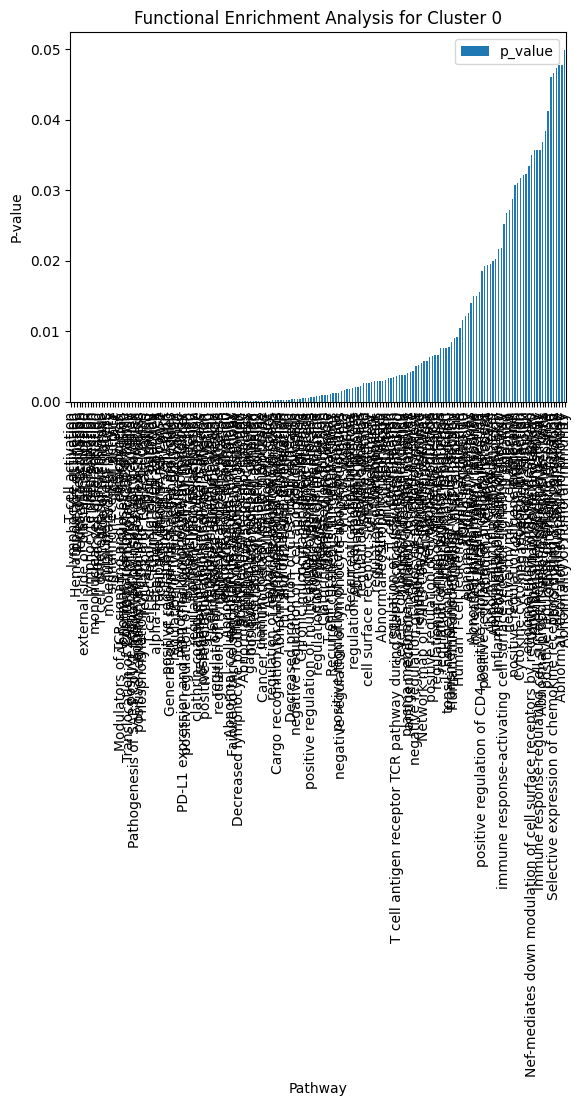

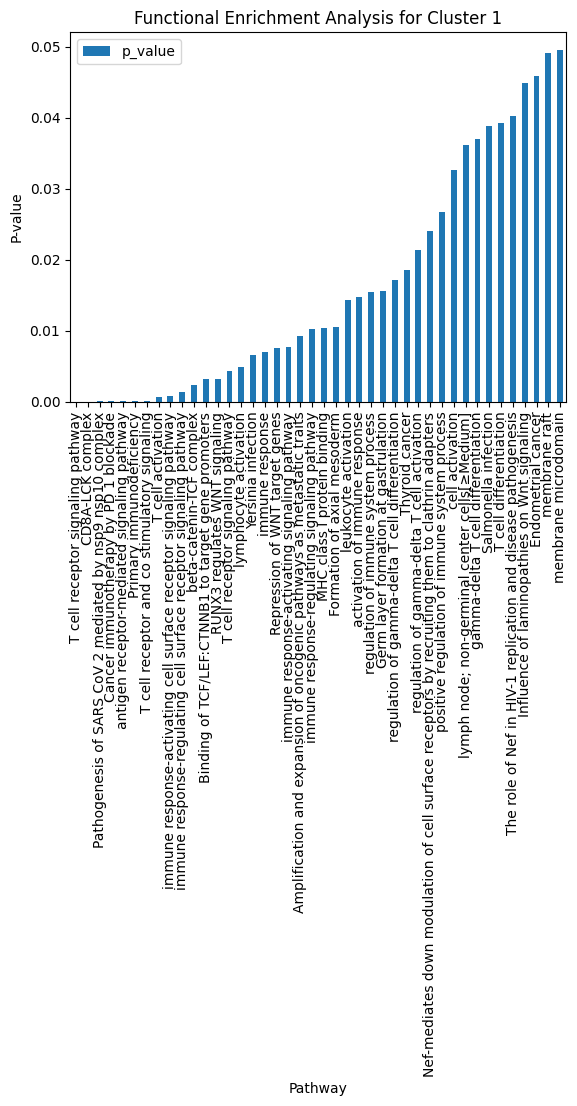

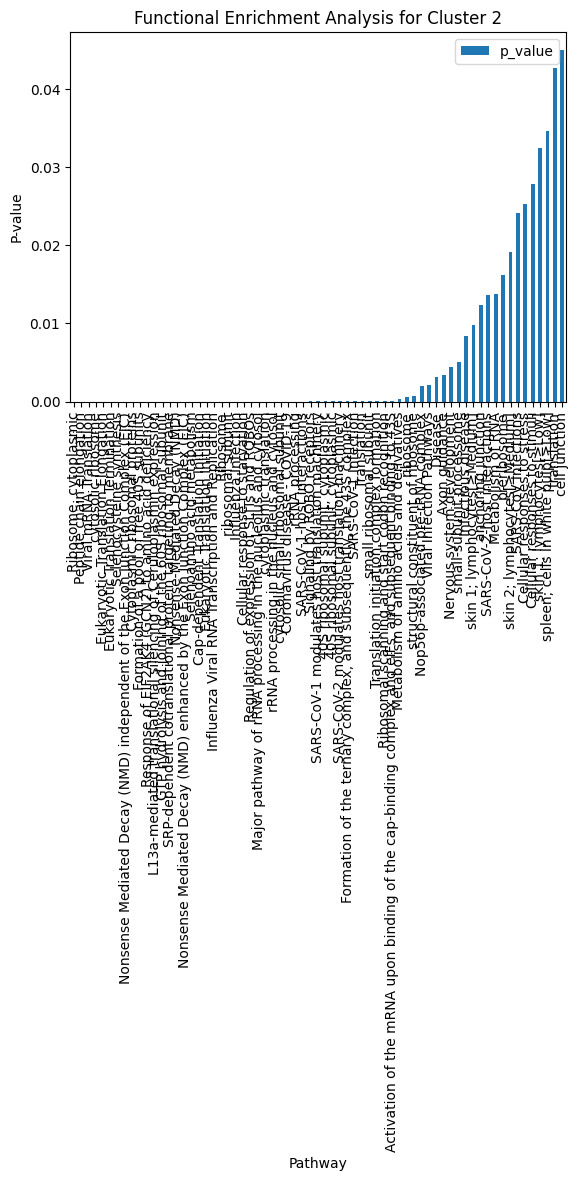

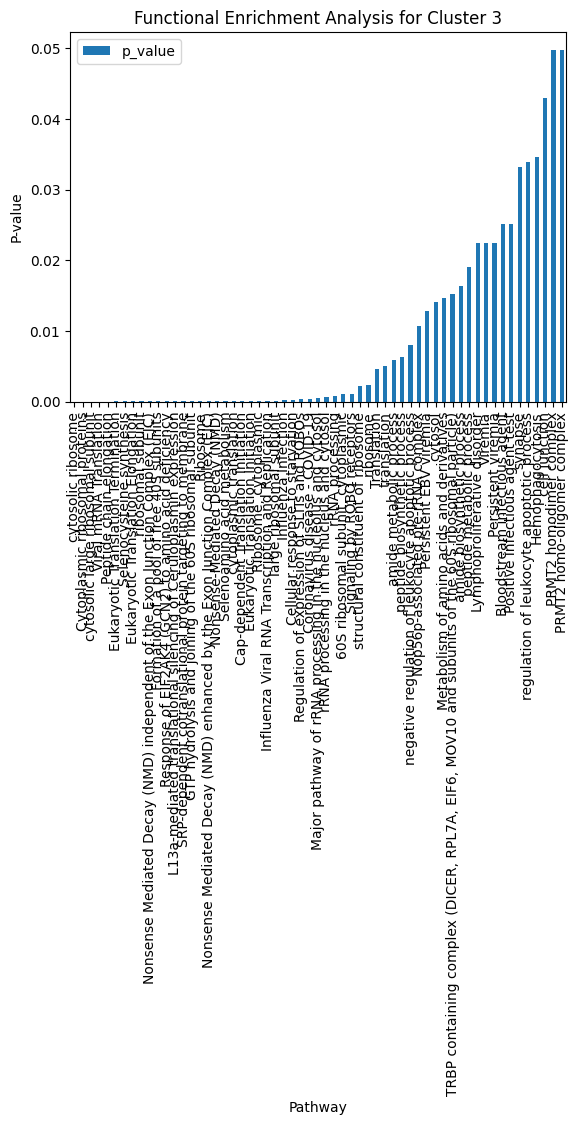

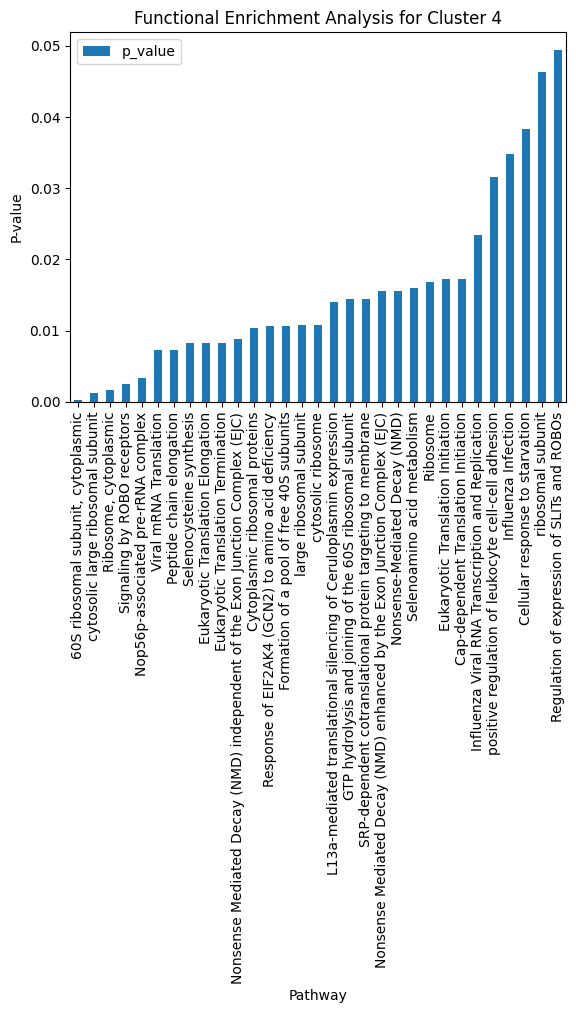

In [25]:
for cluster in range(5):  # Assuming  i have 5 clusters
    top_genes = [gene[0] for gene in adata_citeseq.uns['rank_genes_groups']['names'][cluster * 20: (cluster + 1) * 20]]
    enrichment_results = gp.profile(organism='hsapiens', query=top_genes)
    enrichment_results.to_csv(f'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/enrichment_results_cluster_{cluster}.csv', index=False)
    
    # Plotting the results for each cluster
    enrichment_results.plot.bar(x='name', y='p_value')
    plt.title(f'Functional Enrichment Analysis for Cluster {cluster}')
    plt.xlabel('Pathway')
    plt.ylabel('P-value')
    plt.show()


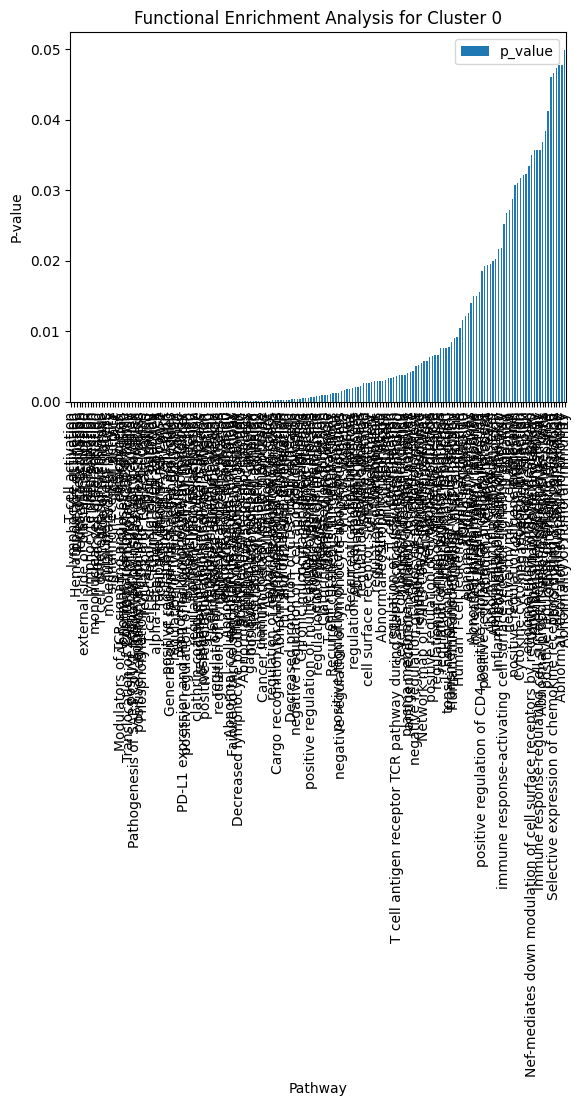

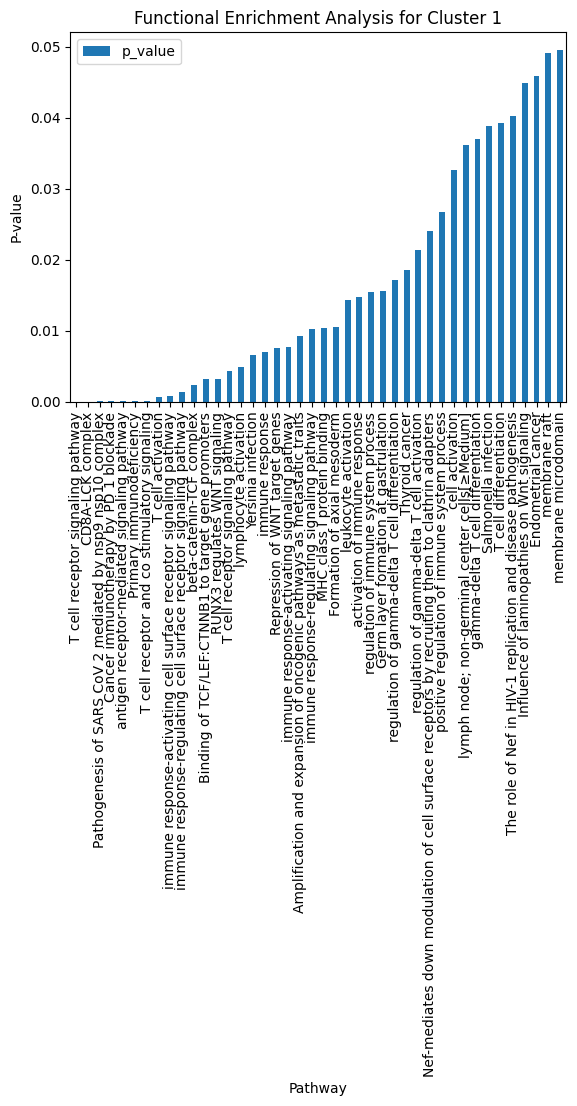

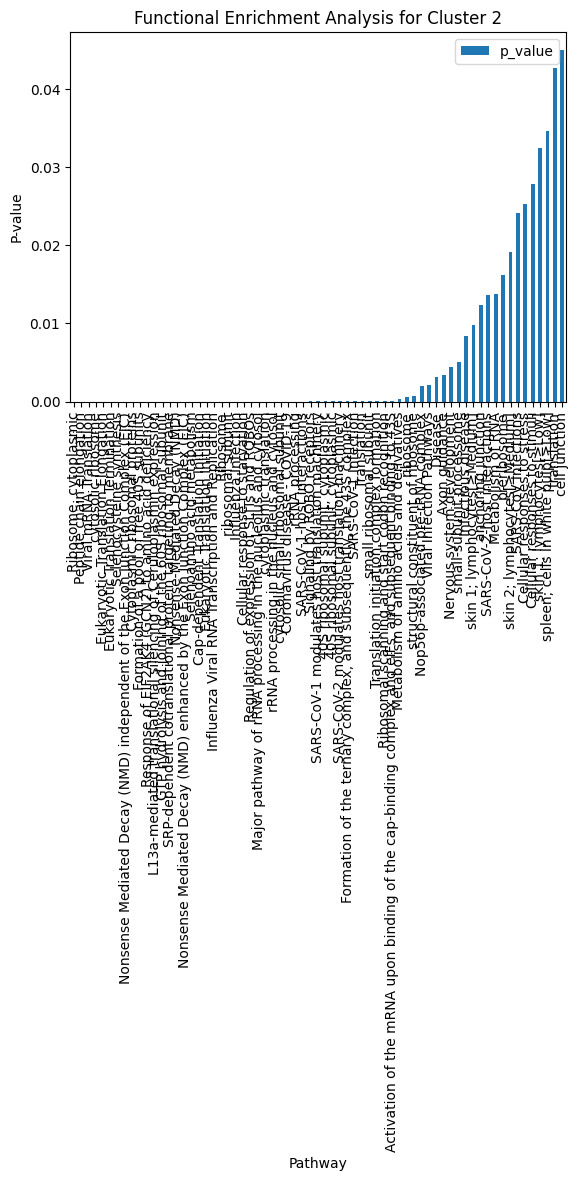

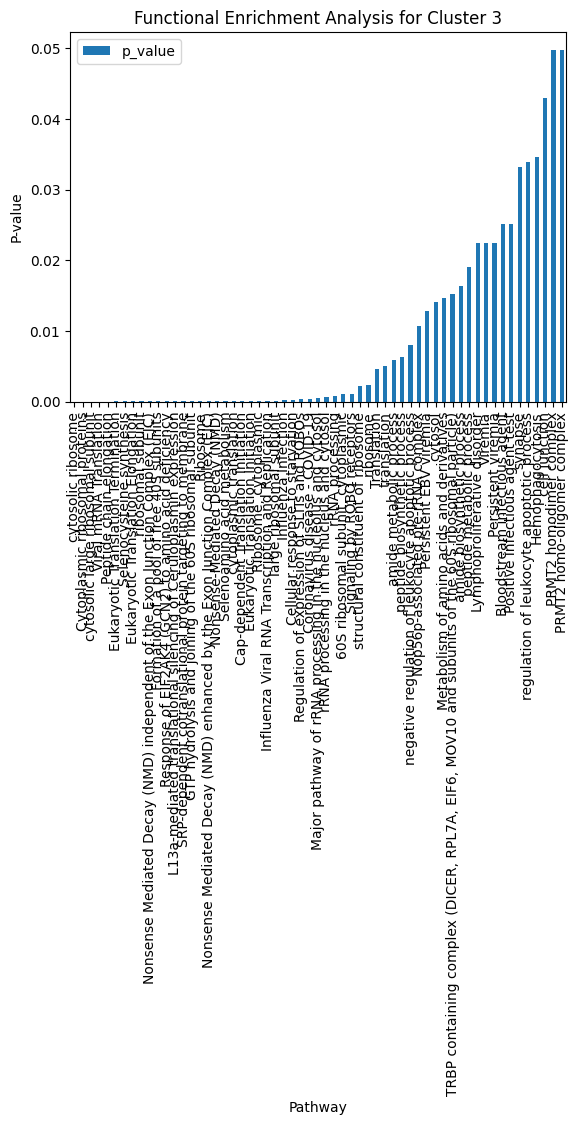

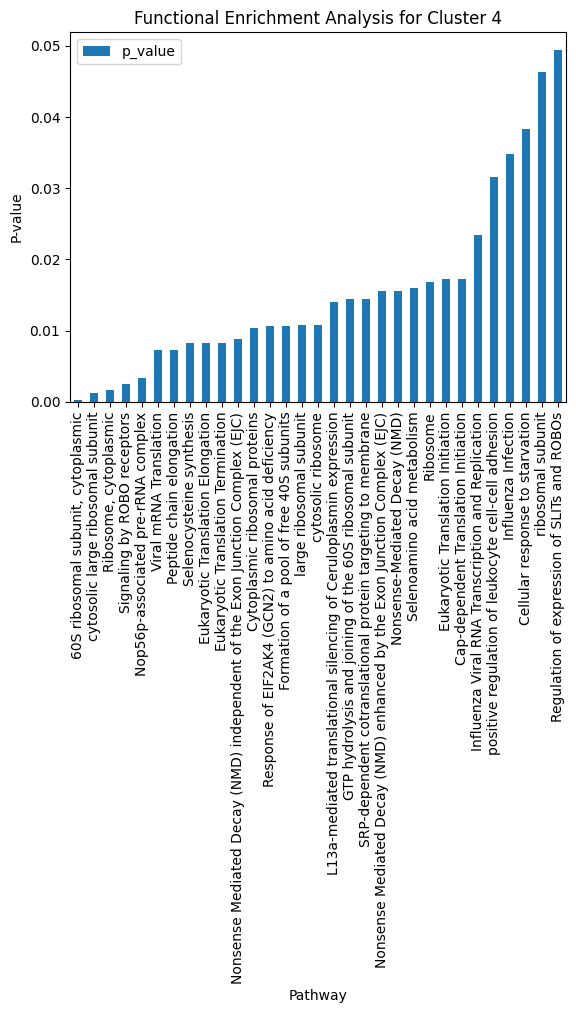

In [26]:
from gprofiler import GProfiler
import matplotlib.pyplot as plt

# Initialize GProfiler
gp = GProfiler(return_dataframe=True)

# Number of clusters (assuming 5 for this example)
num_clusters = 5

# Loop through each cluster
for cluster in range(num_clusters):
    # Extract top 20 genes for the current cluster
    start_idx = cluster * 20
    end_idx = (cluster + 1) * 20
    top_genes = [gene[0] for gene in adata_citeseq.uns['rank_genes_groups']['names'][start_idx:end_idx]]
    
    # Perform enrichment analysis
    enrichment_results = gp.profile(organism='hsapiens', query=top_genes)
    
    # Save results to a CSV file
    enrichment_results.to_csv(f'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/enrichment_results_cluster_{cluster}.csv', index=False)
    
    # Plot enrichment results
    enrichment_results.plot.bar(x='name', y='p_value')
    plt.title(f'Functional Enrichment Analysis for Cluster {cluster}')
    plt.xlabel('Pathway')
    plt.ylabel('P-value')
    plt.show()


Mean Squared Error: 1.432148444176923
R^2 Score: 0.07745375562496803


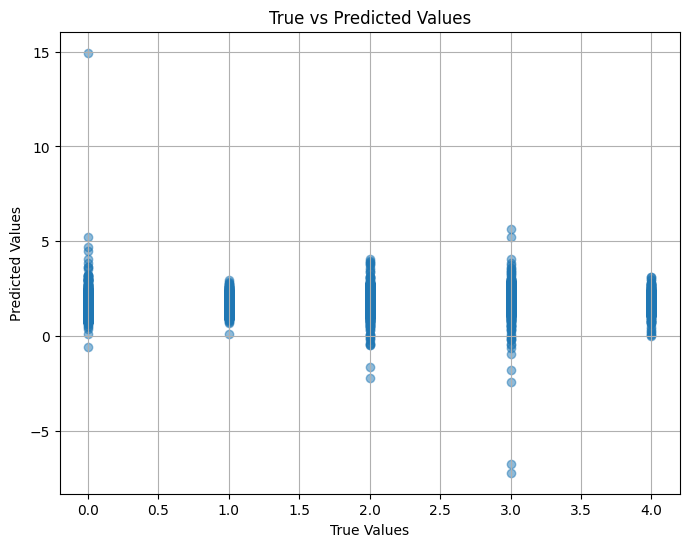

Regression model saved to C:/Users/My computer & laptop/OneDrive/Desktop/javed data/regression_model.pkl


In [1]:
import scanpy as sc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming the PCA results (integrated_pca_result) from previous steps are stored in numpy arrays
integrated_pca_result = np.load('C:/Users/My computer & laptop/OneDrive/Desktop/javed data/integrated_pca_result.npy')
integrated_cluster_labels = np.load('C:/Users/My computer & laptop/OneDrive/Desktop/javed data/integrated_cluster_labels.npy')

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(integrated_pca_result, integrated_cluster_labels, test_size=0.2, random_state=42)

# Train a regression model
regressor = Ridge(alpha=1.0)
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.grid(True)
plt.show()

# Save the regression model
import joblib
model_path = 'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/regression_model.pkl'
joblib.dump(regressor, model_path)

print(f'Regression model saved to {model_path}')


In [2]:
import numpy as np
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Load integrated PCA results and cluster labels
integrated_pca_result = np.load('C:/Users/My computer & laptop/OneDrive/Desktop/javed data/integrated_pca_result.npy')
integrated_cluster_labels = np.load('C:/Users/My computer & laptop/OneDrive/Desktop/javed data/integrated_cluster_labels.npy')

# Initialize a RandomForestRegressor (you can adjust parameters as needed)
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(regressor_rf, integrated_pca_result, integrated_cluster_labels, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert scores to positive MSE values

# Print cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean MSE: {np.mean(cv_scores)}")

# Fit the model on the entire dataset
regressor_rf.fit(integrated_pca_result, integrated_cluster_labels)

# Predict on the test set (assuming X_test and y_test are defined)
y_pred = regressor_rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error (Test Set): {mse}')
print(f'R^2 Score (Test Set): {r2}')

# Save the regression model
model_path_rf = 'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/regression_model_rf.pkl'
joblib.dump(regressor_rf, model_path_rf)

print(f'Regression model saved to {model_path_rf}')


Cross-Validation Scores:
[1.97544215 1.58010932 1.84802695 1.35731852 1.58247686]
Mean MSE: 1.6686747620838822

Mean Squared Error (Test Set): 0.21107073224249262
R^2 Score (Test Set): 0.8640346871027679
Regression model saved to C:/Users/My computer & laptop/OneDrive/Desktop/javed data/regression_model_rf.pkl


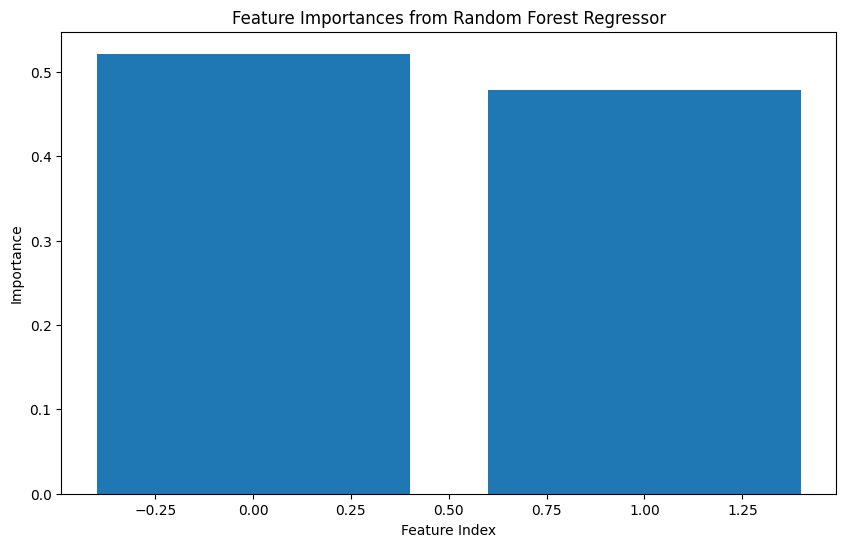

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Load the saved model
model_path_rf = 'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/regression_model_rf.pkl'
regressor_rf = joblib.load(model_path_rf)

# Get feature importances
feature_importances = regressor_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest Regressor')
plt.show()


In [6]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_grid, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(integrated_pca_result, integrated_cluster_labels)

# Print the best parameters and score
print(f'Best Parameters: {random_search.best_params_}')
print(f'Best Score: {-random_search.best_score_}')

# Use the best estimator
best_regressor = random_search.best_estimator_

# Save the best model
best_model_path = 'C:/Users/My computer & laptop/OneDrive/Desktop/javed data/best_regression_model_rf.pkl'
joblib.dump(best_regressor, best_model_path)

print(f'Best regression model saved to {best_model_path}')
# Initialize RandomizedSearchCV with fewer folds
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42), param_distributions=param_grid, n_iter=20, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Best Score: 1.47713578982604
Best regression model saved to C:/Users/My computer & laptop/OneDrive/Desktop/javed data/best_regression_model_rf.pkl
